In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [38]:
#load dataset
diabetes = pd.read_csv('diabetes.csv')

In [39]:
#display first few rows of pandas dataframe
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
diabetes = diabetes.rename(columns={'Pregnancies': 'Pregnant', 'BloodPressure': 'BP', 'SkinThickness': 'Skin', 'DiabetesPedigreeFunction': 'Pedigree'})
diabetes.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
diabetes.describe()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
feature_cols = ['Pregnant', 'Glucose', 'BP', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'Age']
X = diabetes[feature_cols]
y = diabetes.Outcome

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

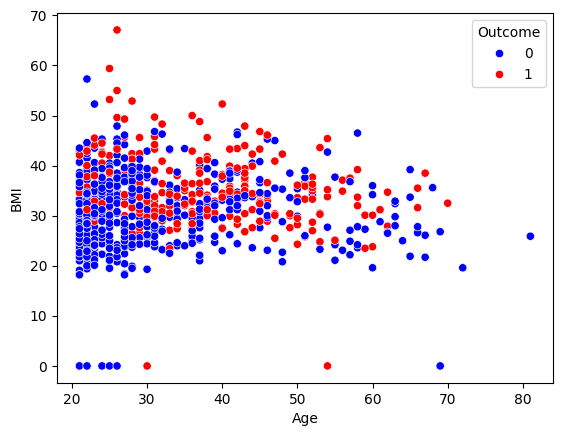

In [44]:
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data = diabetes, palette={0: 'blue', 1: 'red'}, marker='o')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.box(True)
plt.show()

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [47]:
cnf_matrix= confusion_matrix(y_test,y_pred)
cnf_matrix

array([[89,  6],
       [33, 26]])

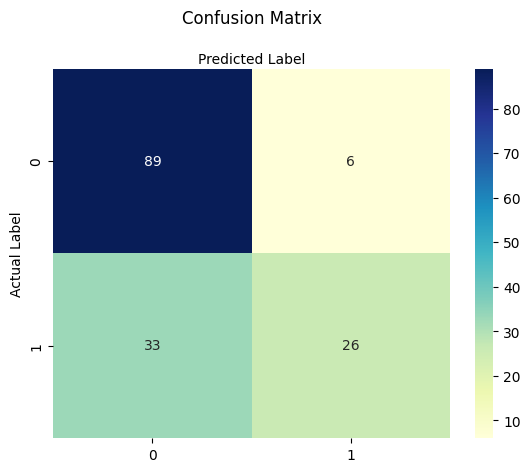

In [48]:
class_names=[0,1] #Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [49]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:{:.2f}%".format(accuracy*100))
f1score=f1_score(y_test,y_pred)
print("F1-Score:",f1score)

Accuracy:74.68%
F1-Score: 0.5714285714285714


In [50]:
target_names= ['No Diabetes','Diabetes']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

 No Diabetes       0.73      0.94      0.82        95
    Diabetes       0.81      0.44      0.57        59

    accuracy                           0.75       154
   macro avg       0.77      0.69      0.70       154
weighted avg       0.76      0.75      0.72       154

